In [1]:
from AC import preproc
from AC import get_news
import inspect
import nltk
nltk.download("stopwords")

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
economia = get_news("./articoli_economia/")
cultura = get_news("./articoli_cultura/")
tech = get_news("./articoli_tech/")
politica = get_news("./articoli_politica/")
sport = get_news("./articoli_sport/")
cronaca = get_news("./articoli_cronaca/")

for articolo in economia:
    articolo['categoria'] = "Economia"
for articolo in cultura:
    articolo['categoria'] = "Cultura"
for articolo in tech:
    articolo['categoria'] = "Tech"
for articolo in politica:
    articolo['categoria'] = "Politica"
for articolo in sport:
    articolo['categoria'] = "Sport"
for articolo in cronaca:
    articolo['categoria'] = "Cronaca"
arts = tech + politica + cultura + economia + sport + cronaca
display(arts[123]["testo"])
dati_preprocessati =  preproc(arts)
display(" ".join(dati_preprocessati[123]["testo"]))

'Compie 15 anni Gmail, il servizio di posta elettronica di Google. Per festeggiare la ricorrenza, la società lancia due nuove funzioni: la prima è la programmazione dell\'invio della posta elettronica, la seconda è un aggiornamento di Smart Compose che aiuta a scrivere le email più velocemente.\n"Il 1 aprile 2004 abbiamo lanciato Gmail, aveva la potenza della ricerca Google, offrendo 1 GB di spazio gratuito: quasi 100 volte quello che era disponibile in quel momento. Non c\'è da stupirsi che il mondo pensasse fosse uno scherzo", scrive l\'azienda di Mountain View in un Post.\nIn occasione della ricorrenza dei 15 anni, la società lancia una funzione di cui alcuni blog specializzati avevano dato anticipazioni nelle scorse settimane: la possibilità di programmare le email ad un orario o una data desiderata, magari più utili o meno inopportuna per chi le leggerà. Oggi arriva anche un aggiornamento della funzione Smart Compose, una funzione predittiva basata sull\'Intelligenza Artificiale e

100%|██████████| 2400/2400 [02:31<00:00, 15.84it/s]


'comp anni gmail serviz post elettron googl festegg ricorrt societ lanc due nuov funzion prim programm invi post elettron second aggiorn smart compos aiut scriv email veloc april lanc gmail potenz ricerc googl offrend gb spaz gratu quas volt dispon quel moment stup mond pens scherz scriv azi mountain view post occasion ricorrt anni societ lanc funzion alcun blog specializz dat anticip scors settiman possibil programm email orar dat desider magar util men inopportun legg oggi arriv aggiorn funzion smart compos funzion preditt bas intelligt artificial apprend automat machin learning aiut comporr messagg manier veloc aggiorn dispon piattaform android ora includ lingu spagnol frances ital portoghes ); ios apple arriv smart compos spieg googl consent utent risparm oltre miliard caratter ogni settiman sufficient riemp pagin mill cop signor anell'

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.dummy import DummyClassifier 
from sklearn.tree import DecisionTreeClassifier
from AC import distribuzione_frequenze, visualizza_topics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline

from plotly.plotly import iplot
import plotly as pl
import numpy as np
from sklearn.manifold import TSNE

from plotly.graph_objs import Scatter3d, Data, Marker

In [4]:
seed = 0
train_documents,test_documents = train_test_split(dati_preprocessati,random_state=seed,train_size=0.5)
test_documents, val_documents = train_test_split(test_documents,random_state=seed,train_size=0.5)

/home/alex/anaconda3/envs/msbd/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [5]:
docs_texts = [' '.join([word for word in x['testo']] + x['tags'] + x['sottotitolo'] + x['titolo_articolo']) for x in dati_preprocessati]
train_texts = [' '.join([word for word in x['testo']] + x['sottotitolo'] + x['titolo_articolo']) for x in train_documents]
test_texts = [' '.join([word for word in x['testo']] + x['sottotitolo'] + x['titolo_articolo']) for x in test_documents]
val_texts = [' '.join([word for word in x['testo']] + x['sottotitolo'] + x['titolo_articolo']) for x in val_documents]

docs_cats = [x["categoria"] for x in dati_preprocessati]
train_cats = [x["categoria"] for x in train_documents]
test_cats = [x["categoria"] for x in test_documents]
val_cats = [x["categoria"] for x in val_documents]#  magari aggiungere anche un esempio "significativo" di come erano i dati prima e dopo il preprocessamento

# Distribuzione frequenze

In [6]:
#fig,ax=plt.subplots(figsize=(20,10))
#distribuzione_frequenze(train_texts,"train",ngrammi=(1,3),min_df=11,max_df=0.9)

9

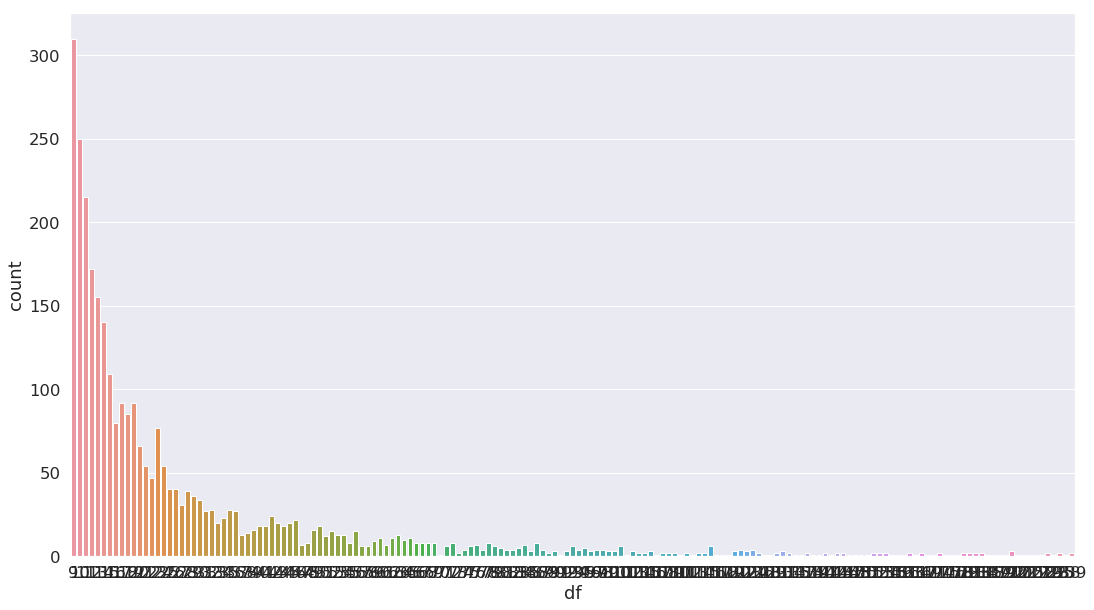

In [7]:
distribuzione_frequenze(train_texts,"train",ngrammi=(1,3),min_df=9,max_df=0.2)

In [8]:
tf = CountVectorizer(max_features=1000000, lowercase=True, min_df=9,max_df=0.5).fit(train_texts)
tf_terms = tf.get_feature_names()
tf_train = tf.transform(train_texts)
ldax = LatentDirichletAllocation(max_iter=50, learning_method='online', random_state=0,n_components=12).fit(tf_train.toarray())
ldax_train = ldax.transform(tf_train.toarray())

# Termini piu' probabili per topic

In [9]:
n = 20
pd.set_option('display.max_colwidth', -1)
visualizza_topics(ldax, tf_terms, n).head(12)

,Termini piu' probabili per topic
Topic,
0,stat due mag anni dop arrest eur uom procur accus aver person poi tre poliz ser carabinier minacc port oggi
1,ital stat italian president ministr ue salvin prim dett paes govern europe part difes fest rom arriv mattarell giugn par
2,milion apple smartphon second nuov prim vend miliard stat app azi huawe dollar oltre anno mond svilupp invest social fin
3,gir ital liverpool magl carapaz ros tapp spagnol final ricord trionf nibal champions oggi vint tottenham veron vinc giu squadr
4,the and of album to nuov grand music giugn tour pap raccont disc dialog cantant rom band world event on
5,batt azzurr parig mond ospit dirett categor tre torne donn svizzer final set prossim ottav stud dop super giorn pag
6,nuov due disposit tecnolog utent googl lanc sfid campion dispon prim tv innov integr present digital prodott sky consent amazon
7,anni film prim giugn guid molt ultim anno raccont sempr rom sal inter dop mag mar part programm festival vit
8,rom mai president cos fatt stat giorn ser dop ex rai incontr parl dett part giornal mag prim poi dic


# Rappresentazione con tSNE(3D) dell'intero

In [14]:
#####Costruisci la term document matrix e poi cerca
documents = [' '.join([word for word in x['testo']] + x['sottotitolo'] + x['titolo_articolo']) for x in dati_preprocessati]
labels = np.array([x['categoria'] for x in dati_preprocessati])

ldac = Pipeline([
    ("count_mx",CountVectorizer(max_features=1000000, lowercase=True)),
    ("lda", LatentDirichletAllocation(max_iter=50, learning_method='online',random_state=0)) 
])

params = {
    'count_mx__ngram_range': (1, 3),
    'count_mx__min_df': 15,
    'count_mx__max_df': 400,
    'lda__n_components':12,
    'lda__learning_decay':0.7
}
ldac.set_params(**params)

Pipeline(memory=None,
     steps=[('count_mx', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=400, max_features=1000000, min_df=15,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
     ...           random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0))])

In [15]:
#LDA
X_topics = ldac.fit_transform(documents)

In [16]:
# Fit the model using t-SNE randomized algorithm
tsne_model = TSNE(n_components=3, verbose=1, random_state=0, init='pca')
# N-D -> 3-D
tsne_lda = tsne_model.fit_transform(X_topics)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.008s...
[t-SNE] Computed neighbors for 2400 samples in 0.814s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 0.016601
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.803825
[t-SNE] KL divergence after 1000 iterations: -1.181642


<font color='red'> Per far funzionare il grafico 3D e' necessaria una connessione internet </font>

In [17]:
from plotly.plotly import iplot
import plotly as pl
import numpy as np
from plotly.graph_objs import Scatter3d, Data, Marker

colormap = np.array([
    "#f7fe72", "#731dd8", "#ffc857", "#40c9a2","#00100b", "#757761",
])

# First three dimensions from reduced X VS the Y
walkers = []

trace0 = Scatter3d(
    x=tsne_lda[0:399, 0],
    y=tsne_lda[0:399, 1],
    z=tsne_lda[0:399, 2], 
    marker=Marker(color=colormap[0], colorscale='Portland',size=3),
    mode='markers',
    name="Tech"
)

trace1 = Scatter3d(
    x=tsne_lda[400:799, 0],
    y=tsne_lda[400:799, 1],
    z=tsne_lda[400:799, 2], 
    marker=Marker(color=colormap[1], colorscale='Portland',size=3),
    mode='markers',
    name="Politica"
)

trace2 = Scatter3d(
    x=tsne_lda[800:1199, 0],
    y=tsne_lda[800:1199, 1],
    z=tsne_lda[800:1199, 2], 
    marker=Marker(color=colormap[2], colorscale='Portland',size=3),
    mode='markers',
    name="Cultura"
)

trace3 = Scatter3d(
    x=tsne_lda[1200:1599, 0],
    y=tsne_lda[1200:1599, 1],
    z=tsne_lda[1200:1599, 2], 
    marker=Marker(color=colormap[3], colorscale='Portland',size=3),
    mode='markers',
    name="Economia"
)

trace4 = Scatter3d(
    x=tsne_lda[1600:1999, 0],
    y=tsne_lda[1600:1999, 1],
    z=tsne_lda[1600:1999, 2], 
    marker=Marker(color=colormap[4], colorscale='Portland',size=3),
    mode='markers',
    name="Sport"
)

trace5 = Scatter3d(
    x=tsne_lda[2000:2399, 0],
    y=tsne_lda[2000:2399, 1],
    z=tsne_lda[2000:2399, 2], 
    marker=Marker(color=colormap[5], colorscale='Portland',size=3),
    mode='markers',
    name="Cronaca"
)

walkers.append(trace0)
walkers.append(trace1)
walkers.append(trace2)
walkers.append(trace3)
walkers.append(trace4)
walkers.append(trace5)

data = Data(walkers) 
pl.tools.set_credentials_file(username='cristi.gutzu', api_key='S4SFAPdXM3dUxDF0wmxT')
iplot(data, filename = 'pca-cloud')

/home/alex/anaconda3/envs/msbd/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


/home/alex/anaconda3/envs/msbd/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


/home/alex/anaconda3/envs/msbd/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

